In [95]:
# Importing Libraries
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
bank = pd.read_csv('bankmarketing.csv')

In [97]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [98]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']

In [99]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [100]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank[categorical_columns] = bank[categorical_columns].apply(le.fit_transform)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [101]:
numerical_columns = ['age','duration','euribor3m']

In [102]:
bank[numerical_columns] = bank[numerical_columns].apply(lambda x: (x - x.mean()) / np.std(x))
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,0.71246,5191.0,no
1,1.628993,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,0.71246,5191.0,no
2,-0.290186,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,0.71246,5191.0,no
3,-0.002309,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,0.71246,5191.0,no
4,1.533034,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,0.71246,5191.0,no


In [103]:
bank = bank[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']]
bank.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.71246
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.71246
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.71246
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.71246
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.71246


In [109]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(bank.values, categorical=[4])

In [110]:
kproto.cluster_centroids_

array([[ 8.02192577e+00,  1.20235108e+00,  4.42926958e+00,
         1.83991547e-01,  3.18187822e-01,  1.79632809e-01,
         1.91916524e+00,  2.01175538e+00,  9.65526351e-01,
         2.72228675e-02, -1.20244831e-02,  1.53775850e-01,
         2.00000000e+00],
       [ 1.43491455e+00,  1.17760741e+00,  5.98706277e+00,
         1.34643028e-01,  3.27902891e-01,  4.77240057e-01,
         5.94665389e+00,  1.94633445e+00,  9.14071235e-01,
         2.81755107e-02, -1.38132610e-02, -1.89537126e-01,
         2.00000000e+00],
       [ 7.95100166e+00,  1.22623453e+00,  3.81855302e+00,
         1.91527370e-01,  3.19637616e-01,  5.03636596e-01,
         6.08842669e+00,  1.98149802e+00,  8.99706520e-01,
        -1.11748780e-01, -7.84284761e-04, -1.97575260e-01,
         2.00000000e+00],
       [ 8.57960894e-01,  1.20251397e+00,  4.72081006e+00,
         1.65502793e-01,  3.49581006e-01,  8.49162011e-02,
         1.52262570e+00,  1.97555866e+00,  9.53072626e-01,
        -3.74758877e-02,  1.82924036e

In [111]:
kproto.cost_

517101.0113172615

In [117]:
bank['cluster_id'] = clusters
round(100*(bank.isnull().sum())/len(bank), 2)

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
age            0.0
duration       0.0
euribor3m      0.0
cluster_id     0.0
dtype: float64

In [113]:
# Checking the clusters created
bank_df = pd.DataFrame(bank['cluster_id'].value_counts())
bank_df

,cluster_id
4,12359
2,7837
0,7571
3,7160
1,6261


<AxesSubplot: ylabel='cluster_id'>

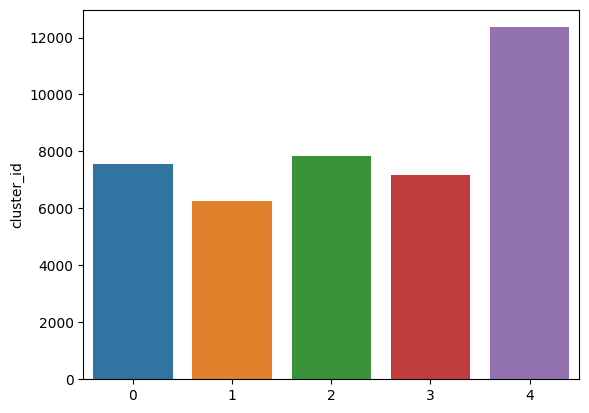

In [114]:
sns.barplot(x=bank_df.index, y=bank_df['cluster_id'])

In [118]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(bank.values, categorical=[4])
    cost.append(kproto.cost_)
    
plt.plot(cost)

KeyboardInterrupt: 